<a href="https://colab.research.google.com/github/renzotaco/ErrorGraficoPie/blob/main/RTC_WindV0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m"
)

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error en la solicitud:", response.status_code)


{'latitude': -18.0, 'longitude': -70.375, 'generationtime_ms': 0.9083747863769531, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 581.0, 'hourly_units': {'time': 'iso8601', 'windspeed_10m': 'km/h', 'winddirection_10m': '°'}, 'hourly': {'time': ['2025-05-23T00:00', '2025-05-23T01:00', '2025-05-23T02:00', '2025-05-23T03:00', '2025-05-23T04:00', '2025-05-23T05:00', '2025-05-23T06:00', '2025-05-23T07:00', '2025-05-23T08:00', '2025-05-23T09:00', '2025-05-23T10:00', '2025-05-23T11:00', '2025-05-23T12:00', '2025-05-23T13:00', '2025-05-23T14:00', '2025-05-23T15:00', '2025-05-23T16:00', '2025-05-23T17:00', '2025-05-23T18:00', '2025-05-23T19:00', '2025-05-23T20:00', '2025-05-23T21:00', '2025-05-23T22:00', '2025-05-23T23:00', '2025-05-24T00:00', '2025-05-24T01:00', '2025-05-24T02:00', '2025-05-24T03:00', '2025-05-24T04:00', '2025-05-24T05:00', '2025-05-24T06:00', '2025-05-24T07:00', '2025-05-24T08:00', '2025-05-24T09:00', '2025-05-24T10:00', '2025-05-24T1

In [4]:
import requests
from datetime import datetime

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m&timezone=America/Lima"
)

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    times = data['hourly']['time']
    wind_speeds = data['hourly']['windspeed_10m']
    wind_dirs = data['hourly']['winddirection_10m']

    print(f"Pronóstico horario de viento para Tacna, Perú:\n")
    for t, speed, direction in zip(times, wind_speeds, wind_dirs):
        # Convertir el tiempo de formato ISO a legible
        time_obj = datetime.fromisoformat(t)
        time_str = time_obj.strftime("%Y-%m-%d %H:%M")

        print(f"Hora: {time_str} | Velocidad del viento: {speed} km/h | Dirección del viento: {direction}°")
else:
    print("Error en la solicitud:", response.status_code)


Pronóstico horario de viento para Tacna, Perú:

Hora: 2025-05-23 00:00 | Velocidad del viento: 2.6 km/h | Dirección del viento: 196°
Hora: 2025-05-23 01:00 | Velocidad del viento: 1.5 km/h | Dirección del viento: 104°
Hora: 2025-05-23 02:00 | Velocidad del viento: 0.8 km/h | Dirección del viento: 27°
Hora: 2025-05-23 03:00 | Velocidad del viento: 1.5 km/h | Dirección del viento: 135°
Hora: 2025-05-23 04:00 | Velocidad del viento: 3.7 km/h | Dirección del viento: 209°
Hora: 2025-05-23 05:00 | Velocidad del viento: 3.3 km/h | Dirección del viento: 221°
Hora: 2025-05-23 06:00 | Velocidad del viento: 2.3 km/h | Dirección del viento: 219°
Hora: 2025-05-23 07:00 | Velocidad del viento: 0.8 km/h | Dirección del viento: 27°
Hora: 2025-05-23 08:00 | Velocidad del viento: 1.8 km/h | Dirección del viento: 233°
Hora: 2025-05-23 09:00 | Velocidad del viento: 2.8 km/h | Dirección del viento: 230°
Hora: 2025-05-23 10:00 | Velocidad del viento: 8.4 km/h | Dirección del viento: 227°
Hora: 2025-05-23 11

In [5]:
import requests
from datetime import datetime
import pytz

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m&timezone=America/Lima"
)

response = requests.get(url)

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

if response.status_code == 200:
    data = response.json()

    times_local = data['hourly']['time']
    wind_speeds = data['hourly']['windspeed_10m']
    wind_dirs = data['hourly']['winddirection_10m']

    # Para convertir tiempo local a UTC
    local_tz = pytz.timezone('America/Lima')

    print(f"{'Hora Local (America/Lima)':20} | {'Hora UTC':20} | {'Velocidad (km/h)':15} | {'Dirección (°)':15} | {'Orientación'}")
    print("-"*95)

    for t, speed, direction in zip(times_local, wind_speeds, wind_dirs):
        # Parsear tiempo local en formato ISO
        local_dt = datetime.fromisoformat(t)
        local_dt = local_tz.localize(local_dt)

        # Convertir a UTC
        utc_dt = local_dt.astimezone(pytz.utc)

        # Obtener orientación cardinal
        cardinal = degrees_to_cardinal(direction)

        print(f"{local_dt.strftime('%Y-%m-%d %H:%M'):20} | {utc_dt.strftime('%Y-%m-%d %H:%M'):20} | {speed:<15} | {direction:<15} | {cardinal}")
else:
    print("Error en la solicitud:", response.status_code)


Hora Local (America/Lima) | Hora UTC             | Velocidad (km/h) | Dirección (°)   | Orientación
-----------------------------------------------------------------------------------------------
2025-05-23 00:00     | 2025-05-23 05:00     | 2.6             | 196             | SSW
2025-05-23 01:00     | 2025-05-23 06:00     | 1.5             | 104             | ESE
2025-05-23 02:00     | 2025-05-23 07:00     | 0.8             | 27              | NNE
2025-05-23 03:00     | 2025-05-23 08:00     | 1.5             | 135             | SE
2025-05-23 04:00     | 2025-05-23 09:00     | 3.7             | 209             | SSW
2025-05-23 05:00     | 2025-05-23 10:00     | 3.3             | 221             | SW
2025-05-23 06:00     | 2025-05-23 11:00     | 2.3             | 219             | SW
2025-05-23 07:00     | 2025-05-23 12:00     | 0.8             | 27              | NNE
2025-05-23 08:00     | 2025-05-23 13:00     | 1.8             | 233             | SW
2025-05-23 09:00     | 2025-05-23 

In [6]:
import requests
from datetime import datetime
import pytz
import csv

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m&timezone=America/Lima"
)

response = requests.get(url)

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

if response.status_code == 200:
    data = response.json()

    times_local = data['hourly']['time']
    wind_speeds = data['hourly']['windspeed_10m']
    wind_dirs = data['hourly']['winddirection_10m']

    local_tz = pytz.timezone('America/Lima')

    # Crear y escribir en CSV
    with open('viento_tacna.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Escribir encabezados
        writer.writerow(['Hora Local (America/Lima)', 'Hora UTC', 'Velocidad (km/h)', 'Dirección (°)', 'Orientación'])

        for t, speed, direction in zip(times_local, wind_speeds, wind_dirs):
            local_dt = datetime.fromisoformat(t)
            local_dt = local_tz.localize(local_dt)
            utc_dt = local_dt.astimezone(pytz.utc)
            cardinal = degrees_to_cardinal(direction)

            # Escribir fila en CSV
            writer.writerow([
                local_dt.strftime('%Y-%m-%d %H:%M'),
                utc_dt.strftime('%Y-%m-%d %H:%M'),
                speed,
                direction,
                cardinal
            ])

    print("Archivo 'viento_tacna.csv' creado con éxito.")
else:
    print("Error en la solicitud:", response.status_code)


Archivo 'viento_tacna.csv' creado con éxito.


In [10]:
import requests
from datetime import datetime
import pytz

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m&timezone=America/Lima"
)

response = requests.get(url)

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

if response.status_code == 200:
    data = response.json()

    times_local = data['hourly']['time']
    wind_speeds_kmh = data['hourly']['windspeed_10m']
    wind_dirs = data['hourly']['winddirection_10m']

    # Para convertir tiempo local a UTC
    local_tz = pytz.timezone('America/Lima')

    print(f"{'Hora Local (America/Lima)':20} | {'Hora UTC':20} | {'Velocidad (m/s)':15} | {'Dirección (°)':15} | {'Orientación'}")
    print("-"*95)

    for t, speed_kmh, direction in zip(times_local, wind_speeds_kmh, wind_dirs):
        # Parsear tiempo local en formato ISO
        local_dt = datetime.fromisoformat(t)
        local_dt = local_tz.localize(local_dt)

        # Convertir a UTC
        utc_dt = local_dt.astimezone(pytz.utc)

        # Convertir velocidad de km/h a m/s
        speed_ms = speed_kmh / 3.6

        # Obtener orientación cardinal
        cardinal = degrees_to_cardinal(direction)

        print(f"{local_dt.strftime('%Y-%m-%d %H:%M'):20} | {utc_dt.strftime('%Y-%m-%d %H:%M'):20} | {speed_ms:<15.2f} | {direction:<15} | {cardinal}")
else:
    print("Error en la solicitud:", response.status_code)


Hora Local (America/Lima) | Hora UTC             | Velocidad (m/s) | Dirección (°)   | Orientación
-----------------------------------------------------------------------------------------------
2025-05-23 00:00     | 2025-05-23 05:00     | 0.72            | 196             | SSW
2025-05-23 01:00     | 2025-05-23 06:00     | 0.42            | 104             | ESE
2025-05-23 02:00     | 2025-05-23 07:00     | 0.22            | 27              | NNE
2025-05-23 03:00     | 2025-05-23 08:00     | 0.42            | 135             | SE
2025-05-23 04:00     | 2025-05-23 09:00     | 1.03            | 209             | SSW
2025-05-23 05:00     | 2025-05-23 10:00     | 0.92            | 221             | SW
2025-05-23 06:00     | 2025-05-23 11:00     | 0.64            | 219             | SW
2025-05-23 07:00     | 2025-05-23 12:00     | 0.22            | 27              | NNE
2025-05-23 08:00     | 2025-05-23 13:00     | 0.50            | 233             | SW
2025-05-23 09:00     | 2025-05-23 1

In [11]:
import requests
from datetime import datetime
import pytz
import csv

latitude = -18.0114
longitude = -70.2463

url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=windspeed_10m,winddirection_10m&timezone=America/Lima"
)

response = requests.get(url)

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

if response.status_code == 200:
    data = response.json()

    times_local = data['hourly']['time']
    wind_speeds_kmh = data['hourly']['windspeed_10m']
    wind_dirs = data['hourly']['winddirection_10m']

    local_tz = pytz.timezone('America/Lima')

    # Crear archivo CSV y escribir encabezado
    with open('viento_tacna_m_s.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Hora Local (America/Lima)', 'Hora UTC', 'Velocidad (m/s)', 'Dirección (°)', 'Orientación'])

        for t, speed_kmh, direction in zip(times_local, wind_speeds_kmh, wind_dirs):
            local_dt = datetime.fromisoformat(t)
            local_dt = local_tz.localize(local_dt)
            utc_dt = local_dt.astimezone(pytz.utc)

            speed_ms = speed_kmh / 3.6
            cardinal = degrees_to_cardinal(direction)

            writer.writerow([
                local_dt.strftime('%Y-%m-%d %H:%M'),
                utc_dt.strftime('%Y-%m-%d %H:%M'),
                f"{speed_ms:.2f}",
                f"{direction:.1f}",
                cardinal
            ])
    print("Archivo 'viento_tacna_m_s.csv' creado con éxito.")
else:
    print("Error en la solicitud:", response.status_code)


Archivo 'viento_tacna_m_s.csv' creado con éxito.


In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

# Cargar datos desde CSV
df = pd.read_csv('viento_tacna_m_s.csv')

# Convertir columna 'Hora Local (America/Lima)' a datetime
df['Hora Local (America/Lima)'] = pd.to_datetime(df['Hora Local (America/Lima)'])

# Extraer la fecha (sin hora) para agrupar por día
df['Fecha'] = df['Hora Local (America/Lima)'].dt.date

# Agrupar por día y calcular velocidad media diaria del viento
daily_wind = df.groupby('Fecha')['Velocidad (m/s)'].mean()

# Encontrar día con mayor y menor velocidad media
dia_mayor_viento = daily_wind.idxmax()
mayor_velocidad = daily_wind.max()

dia_menor_viento = daily_wind.idxmin()
menor_velocidad = daily_wind.min()

print(f"Día con mayor viento promedio: {dia_mayor_viento} con {mayor_velocidad:.2f} m/s")
print(f"Día con menor viento promedio: {dia_menor_viento} con {menor_velocidad:.2f} m/s")

# Calcular tendencia lineal (regresión simple)
# Convertimos las fechas a números para la regresión (días desde el primero)
x = np.arange(len(daily_wind))
y = daily_wind.values

# Coeficiente angular (pendiente) de la regresión lineal
coef = np.polyfit(x, y, 1)[0]

if coef > 0:
    print(f"Tendencia: Aumento de velocidad del viento en {coef:.4f} m/s por día.")
elif coef < 0:
    print(f"Tendencia: Disminución de velocidad del viento en {abs(coef):.4f} m/s por día.")
else:
    print("Tendencia: Velocidad del viento estable sin cambios significativos.")



Día con mayor viento promedio: 2025-05-24 con 1.72 m/s
Día con menor viento promedio: 2025-05-29 con 1.50 m/s
Tendencia: Disminución de velocidad del viento en 0.0226 m/s por día.


Día con mayor viento promedio: 2025-05-24 con 1.72 m/s
Día con menor viento promedio: 2025-05-29 con 1.50 m/s
Tendencia: Disminución de velocidad del viento en 0.0226 m/s por día.


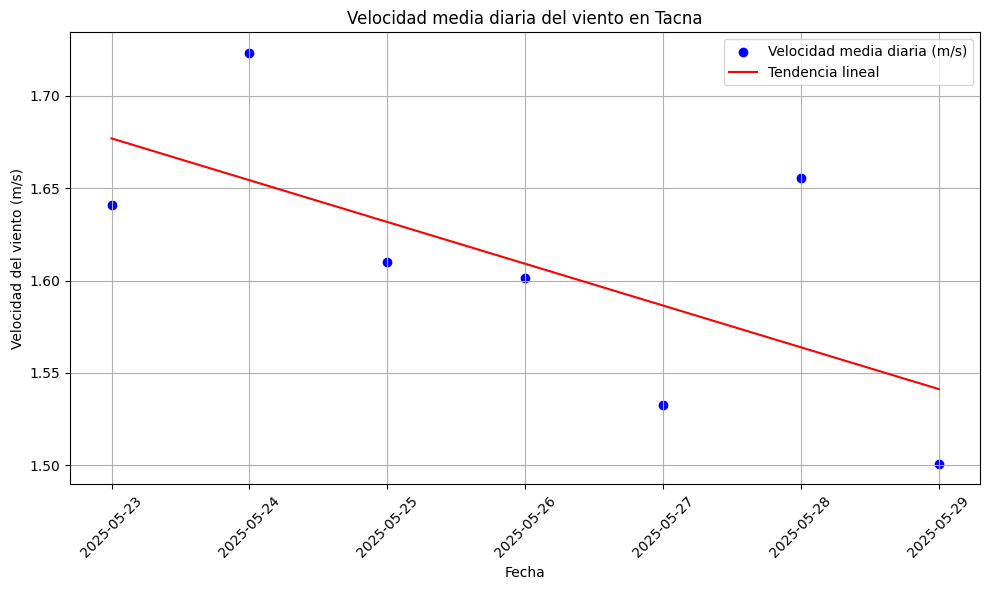

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Cargar datos desde CSV
df = pd.read_csv('viento_tacna_m_s.csv')

# Convertir columna 'Hora Local (America/Lima)' a datetime
df['Hora Local (America/Lima)'] = pd.to_datetime(df['Hora Local (America/Lima)'])

# Extraer la fecha (sin hora) para agrupar por día
df['Fecha'] = df['Hora Local (America/Lima)'].dt.date

# Agrupar por día y calcular velocidad media diaria del viento
daily_wind = df.groupby('Fecha')['Velocidad (m/s)'].mean()

# Encontrar día con mayor y menor velocidad media
dia_mayor_viento = daily_wind.idxmax()
mayor_velocidad = daily_wind.max()

dia_menor_viento = daily_wind.idxmin()
menor_velocidad = daily_wind.min()

print(f"Día con mayor viento promedio: {dia_mayor_viento} con {mayor_velocidad:.2f} m/s")
print(f"Día con menor viento promedio: {dia_menor_viento} con {menor_velocidad:.2f} m/s")

# Calcular tendencia lineal (regresión simple)
x = np.arange(len(daily_wind))
y = daily_wind.values

coef, intercept = np.polyfit(x, y, 1)

if coef > 0:
    print(f"Tendencia: Aumento de velocidad del viento en {coef:.4f} m/s por día.")
elif coef < 0:
    print(f"Tendencia: Disminución de velocidad del viento en {abs(coef):.4f} m/s por día.")
else:
    print("Tendencia: Velocidad del viento estable sin cambios significativos.")

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(daily_wind.index, y, color='blue', label='Velocidad media diaria (m/s)')
plt.plot(daily_wind.index, coef * x + intercept, color='red', label='Tendencia lineal')

plt.title('Velocidad media diaria del viento en Tacna')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del viento (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Día con mayor viento promedio: 2025-05-24 con 1.72 m/s
Día con menor viento promedio: 2025-05-29 con 1.50 m/s
Tendencia: Disminución de velocidad del viento en 0.0226 m/s por día.


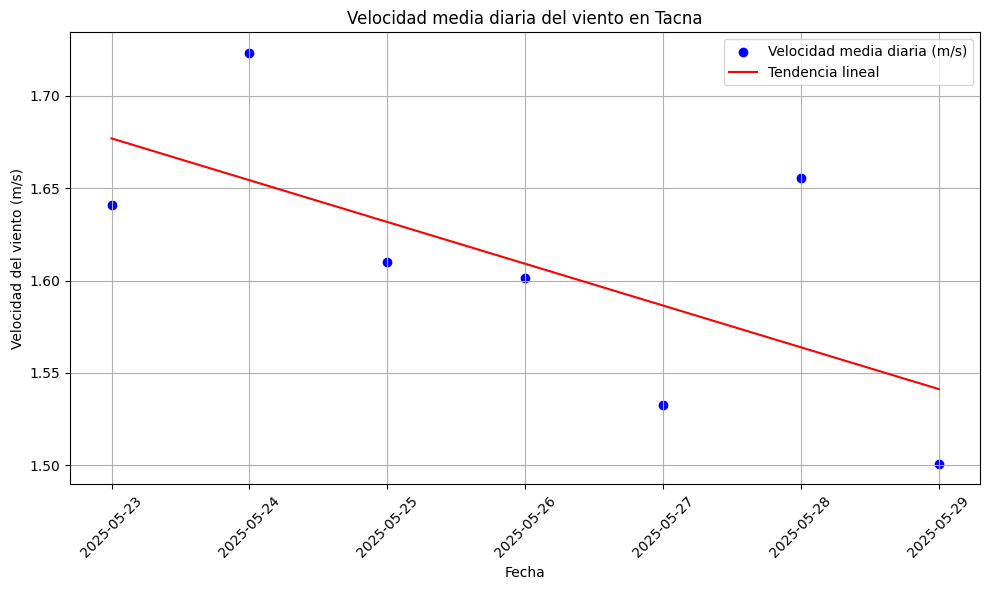

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Cargar datos desde CSV
df = pd.read_csv('viento_tacna_m_s.csv')

# Convertir columna 'Hora Local (America/Lima)' a datetime
df['Hora Local (America/Lima)'] = pd.to_datetime(df['Hora Local (America/Lima)'])

# Extraer la fecha (sin hora) para agrupar por día
df['Fecha'] = df['Hora Local (America/Lima)'].dt.date

# Agrupar por día y calcular velocidad media diaria del viento
daily_wind = df.groupby('Fecha')['Velocidad (m/s)'].mean()

# Encontrar día con mayor y menor velocidad media
dia_mayor_viento = daily_wind.idxmax()
mayor_velocidad = daily_wind.max()

dia_menor_viento = daily_wind.idxmin()
menor_velocidad = daily_wind.min()

print(f"Día con mayor viento promedio: {dia_mayor_viento} con {mayor_velocidad:.2f} m/s")
print(f"Día con menor viento promedio: {dia_menor_viento} con {menor_velocidad:.2f} m/s")

# Calcular tendencia lineal (regresión simple)
x = np.arange(len(daily_wind))
y = daily_wind.values

coef, intercept = np.polyfit(x, y, 1)

if coef > 0:
    print(f"Tendencia: Aumento de velocidad del viento en {coef:.4f} m/s por día.")
elif coef < 0:
    print(f"Tendencia: Disminución de velocidad del viento en {abs(coef):.4f} m/s por día.")
else:
    print("Tendencia: Velocidad del viento estable sin cambios significativos.")

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(daily_wind.index, y, color='blue', label='Velocidad media diaria (m/s)')
plt.plot(daily_wind.index, coef * x + intercept, color='red', label='Tendencia lineal')

plt.title('Velocidad media diaria del viento en Tacna')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del viento (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

# Guardar la figura en archivo PNG
plt.savefig('tendencia_viento_tacna.png', dpi=300)

plt.show()


In [7]:
import requests
from datetime import datetime
import pytz

# Coordenadas Tacna, Perú
latitude = -18.0114
longitude = -70.2463

# URL API Met.no para el pronóstico de ubicación específica
url = f"https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={latitude}&lon={longitude}"

# Es importante incluir un User-Agent válido (requisito de Met.no)
headers = {
    "User-Agent": "Dante-ExampleApp/1.0 (contact: tuemail@dominio.com)"
}

response = requests.get(url, headers=headers)

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

if response.status_code == 200:
    data = response.json()

    # El pronóstico horario está en data['properties']['timeseries']
    timeseries = data['properties']['timeseries']

    # Usamos pytz para manejar zona horaria Lima
    local_tz = pytz.timezone('America/Lima')

    print(f"{'Hora Local (America/Lima)':20} | {'Velocidad (m/s)':15} | {'Dirección (°)':15} | {'Orientación'}")
    print("-"*70)

    for entry in timeseries[:24]:  # mostramos las próximas 24 horas
        time_utc = datetime.fromisoformat(entry['time'].replace('Z', '+00:00'))
        time_local = time_utc.astimezone(local_tz)

        details = entry['data']['instant']['details']

        wind_speed = details.get('wind_speed', None)
        wind_dir = details.get('wind_from_direction', None)

        if wind_speed is not None and wind_dir is not None:
            cardinal = degrees_to_cardinal(wind_dir)
            print(f"{time_local.strftime('%Y-%m-%d %H:%M'):20} | {wind_speed:<15.2f} | {wind_dir:<15.1f} | {cardinal}")
else:
    print("Error en la solicitud:", response.status_code)


Hora Local (America/Lima) | Velocidad (m/s) | Dirección (°)   | Orientación
----------------------------------------------------------------------
2025-05-23 05:00     | 1.60            | 221.2           | SW
2025-05-23 06:00     | 1.50            | 318.2           | NW
2025-05-23 07:00     | 1.20            | 342.3           | NNW
2025-05-23 08:00     | 1.00            | 253.2           | WSW
2025-05-23 09:00     | 1.20            | 257.8           | WSW
2025-05-23 10:00     | 2.30            | 243.8           | WSW
2025-05-23 11:00     | 3.10            | 230.4           | SW
2025-05-23 12:00     | 3.30            | 226.5           | SW
2025-05-23 13:00     | 3.60            | 226.3           | SW
2025-05-23 14:00     | 3.80            | 224.7           | SW
2025-05-23 15:00     | 3.30            | 222.5           | SW
2025-05-23 16:00     | 2.70            | 226.7           | SW
2025-05-23 17:00     | 2.30            | 232.7           | SW
2025-05-23 18:00     | 1.70            | 21

In [9]:
import requests
from datetime import datetime
import pytz
import csv

# Coordenadas Tacna, Perú
latitude = -18.0114
longitude = -70.2463

url = f"https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={latitude}&lon={longitude}"

headers = {
    "User-Agent": "Renzo-Taco-WIND/1.0 (contact: rentaco@upt.pe)"
}

def degrees_to_cardinal(degrees):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = int((degrees + 11.25) / 22.5) % 16
    return dirs[ix]

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    timeseries = data['properties']['timeseries']
    local_tz = pytz.timezone('America/Lima')

    with open('viento_tacna_metno.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Escribir encabezados
        writer.writerow(['Hora Local (America/Lima)', 'Velocidad (m/s)', 'Dirección (°)', 'Orientación'])

        for entry in timeseries[:24]:  # Próximas 24 horas
            time_utc = datetime.fromisoformat(entry['time'].replace('Z', '+00:00'))
            time_local = time_utc.astimezone(local_tz)

            details = entry['data']['instant']['details']

            wind_speed = details.get('wind_speed', None)
            wind_dir = details.get('wind_from_direction', None)

            if wind_speed is not None and wind_dir is not None:
                cardinal = degrees_to_cardinal(wind_dir)
                writer.writerow([
                    time_local.strftime('%Y-%m-%d %H:%M'),
                    f"{wind_speed:.2f}",
                    f"{wind_dir:.1f}",
                    cardinal
                ])

    print("Archivo 'viento_tacna_metno.csv' creado con éxito.")
else:
    print("Error en la solicitud:", response.status_code)


Archivo 'viento_tacna_metno.csv' creado con éxito.


Día con mayor viento promedio: 2025-05-23 con 1.98 m/s
Día con menor viento promedio: 2025-05-24 con 1.76 m/s
Tendencia: Disminución de velocidad del viento en 0.2242 m/s por día.


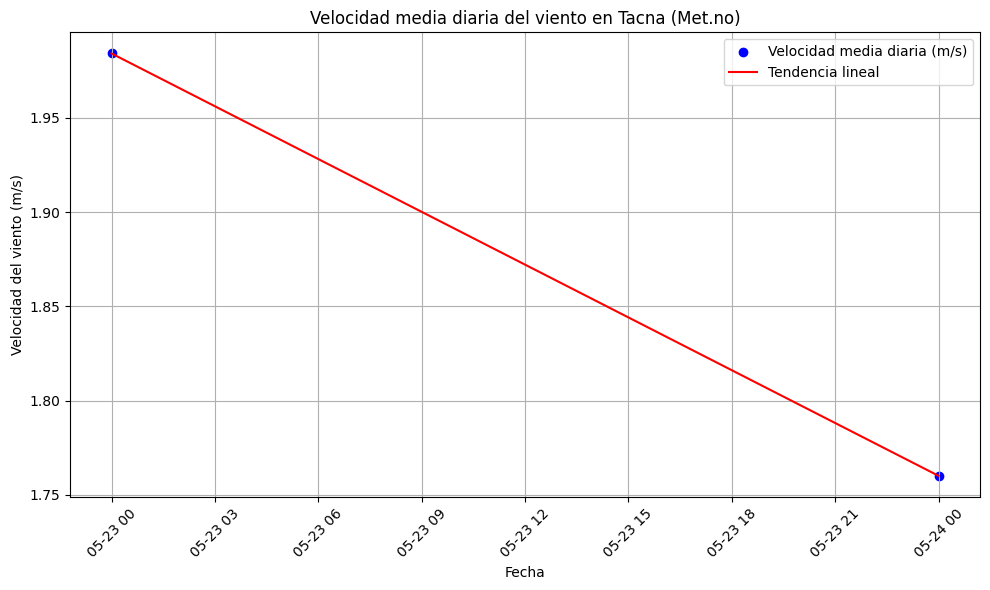

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos desde CSV generado por Met.no
df = pd.read_csv('viento_tacna_metno.csv')

# Convertir columna 'Hora Local (America/Lima)' a datetime
df['Hora Local (America/Lima)'] = pd.to_datetime(df['Hora Local (America/Lima)'])

# Extraer fecha (sin hora) para agrupar por día
df['Fecha'] = df['Hora Local (America/Lima)'].dt.date

# Agrupar por día y calcular velocidad media diaria del viento
daily_wind = df.groupby('Fecha')['Velocidad (m/s)'].mean()

# Encontrar día con mayor y menor velocidad media
dia_mayor_viento = daily_wind.idxmax()
mayor_velocidad = daily_wind.max()

dia_menor_viento = daily_wind.idxmin()
menor_velocidad = daily_wind.min()

print(f"Día con mayor viento promedio: {dia_mayor_viento} con {mayor_velocidad:.2f} m/s")
print(f"Día con menor viento promedio: {dia_menor_viento} con {menor_velocidad:.2f} m/s")

# Calcular tendencia lineal (regresión simple)
x = np.arange(len(daily_wind))
y = daily_wind.values

coef, intercept = np.polyfit(x, y, 1)

if coef > 0:
    print(f"Tendencia: Aumento de velocidad del viento en {coef:.4f} m/s por día.")
elif coef < 0:
    print(f"Tendencia: Disminución de velocidad del viento en {abs(coef):.4f} m/s por día.")
else:
    print("Tendencia: Velocidad del viento estable sin cambios significativos.")

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(daily_wind.index, y, color='blue', label='Velocidad media diaria (m/s)')
plt.plot(daily_wind.index, coef * x + intercept, color='red', label='Tendencia lineal')

plt.title('Velocidad media diaria del viento en Tacna (Met.no)')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del viento (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

# Guardar gráfico
plt.savefig('tendencia_viento_tacna_metno.png', dpi=300)

plt.show()


Análisis viento a 10 metros:
10 m - Día con mayor viento promedio: 2025-05-24 con 1.72 m/s
10 m - Día con menor viento promedio: 2025-05-29 con 1.50 m/s
10 m - Tendencia: disminución de 0.0226 m/s por día.

Análisis viento a 15 metros:
15 m - Día con mayor viento promedio: 2025-05-24 con 1.84 m/s
15 m - Día con menor viento promedio: 2025-05-29 con 1.61 m/s
15 m - Tendencia: disminución de 0.0242 m/s por día.


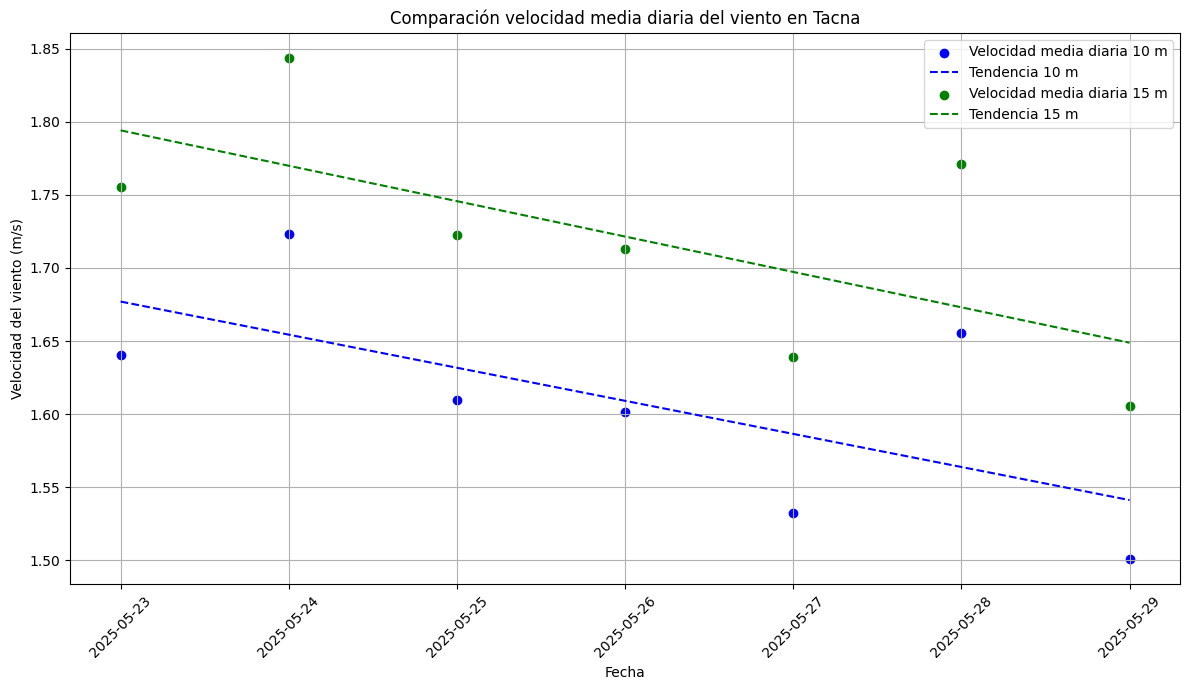

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def wind_speed_at_height(V10, z, z0=0.03):
    """
    Estima la velocidad del viento a altura z usando perfil logarítmico.
    V10: velocidad a 10 m (m/s)
    z: altura objetivo (m)
    z0: rugosidad del terreno (m), 0.03 para terreno abierto
    """
    return V10 * (np.log(z / z0) / np.log(10 / z0))

# Cargar CSV con velocidades a 10 m
df = pd.read_csv('viento_tacna_m_s.csv')

# Convertir fecha a datetime
df['Hora Local (America/Lima)'] = pd.to_datetime(df['Hora Local (America/Lima)'])

# Altura objetivo para estimar (15 metros)
altura_objetivo = 15

# Calcular velocidad estimada a 15 m
df[f'Velocidad {altura_objetivo} m'] = wind_speed_at_height(df['Velocidad (m/s)'], altura_objetivo)

# Extraer fecha para agrupar por día
df['Fecha'] = df['Hora Local (America/Lima)'].dt.date

# Agrupar por día y calcular velocidad media diaria a 10 m y 15 m
daily_wind_10m = df.groupby('Fecha')['Velocidad (m/s)'].mean()
daily_wind_15m = df.groupby('Fecha')[f'Velocidad {altura_objetivo} m'].mean()

# Función para análisis y tendencia
def analyze_wind(daily_wind, label):
    dia_mayor = daily_wind.idxmax()
    mayor_vel = daily_wind.max()
    dia_menor = daily_wind.idxmin()
    menor_vel = daily_wind.min()

    print(f"{label} - Día con mayor viento promedio: {dia_mayor} con {mayor_vel:.2f} m/s")
    print(f"{label} - Día con menor viento promedio: {dia_menor} con {menor_vel:.2f} m/s")

    x = np.arange(len(daily_wind))
    y = daily_wind.values
    coef, intercept = np.polyfit(x, y, 1)

    if coef > 0:
        print(f"{label} - Tendencia: aumento de {coef:.4f} m/s por día.")
    elif coef < 0:
        print(f"{label} - Tendencia: disminución de {abs(coef):.4f} m/s por día.")
    else:
        print(f"{label} - Tendencia: estable sin cambios significativos.")

    return x, y, coef, intercept

print("Análisis viento a 10 metros:")
x10, y10, coef10, intercept10 = analyze_wind(daily_wind_10m, "10 m")

print("\nAnálisis viento a 15 metros:")
x15, y15, coef15, intercept15 = analyze_wind(daily_wind_15m, "15 m")

# Graficar comparativo
plt.figure(figsize=(12, 7))
plt.scatter(daily_wind_10m.index, y10, color='blue', label='Velocidad media diaria 10 m')
plt.plot(daily_wind_10m.index, coef10 * x10 + intercept10, color='blue', linestyle='--', label='Tendencia 10 m')

plt.scatter(daily_wind_15m.index, y15, color='green', label='Velocidad media diaria 15 m')
plt.plot(daily_wind_15m.index, coef15 * x15 + intercept15, color='green', linestyle='--', label='Tendencia 15 m')

plt.title('Comparación velocidad media diaria del viento en Tacna')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del viento (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('comparacion_viento_10m_15m_tacna.png', dpi=300)
plt.show()
